# Data preparation

1.Loading 'rideshare_kaggle'csv Files as a DataFrame and check the data type

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from datetime import datetime
import seaborn as sns
sns.set()
from scipy import stats

In [121]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/DA/assignment")
df=pd.read_csv('rideshare_kaggle.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [122]:
print(df.dtypes)

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

2. Check Null Value

In [123]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [124]:
df.dropna(subset=['price'],inplace=True)
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

# Building new datas framework for data exploration

1.Add 'weekday/weekend' column

In [125]:
df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

id                                     object
timestamp                             float64
hour                                    int64
day                                     int64
month                                   int64
datetime                       datetime64[ns]
timezone                               object
source                                 object
destination                            object
cab_type                               object
product_id                             object
name                                   object
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
short_summary                          object
long_summary                           object
precipIntensity                   

In [126]:
df['day_of_week']=df['datetime'].dt.dayofweek
df['weekday/weekend']=df['day_of_week'].apply(lambda x:'Weekend' if x>=5 else 'Weekday')

2.Add the 'price per kilometre' column

In [127]:
df['price per kilometre']=df['price']/df['distance']

3.Add 'weather' cloumn

In [128]:
df['long_summary'].value_counts()

 Mostly cloudy throughout the day.                      186262
 Partly cloudy throughout the day.                      133744
 Light rain in the morning.                              94423
 Rain throughout the day.                                49929
 Light rain in the morning and overnight.                46575
 Rain until morning, starting again in the evening.      44071
 Foggy in the morning.                                   41201
 Light rain until evening.                               32690
 Overcast throughout the day.                             6906
 Possible drizzle in the morning.                         1708
 Rain in the morning and afternoon.                        467
Name: long_summary, dtype: int64

In [129]:
def weather(weather):
  if 'rain' in weather.lower():
    return 1 #rain
  else:
    return 0 #not rain
df['Weather']=df['long_summary'].apply(weather)

4.Add 'timeseries' cloumn

In [130]:
df['datetime']=pd.to_datetime(df[['month','day']].assign(year=2018))
df['timeseries']=pd.to_datetime(df[['month','day','hour']].assign(year=2018))

5.Change the description of the car type

In [131]:
dict_name= {
      'Shared':'share',
      'UberPool':'share',
      'Lyft':'standard 4',
      'UberX':'standard 4',
      'Lux':'premium 4',
      'Lux Black':'premium plus 4',
      'Black':'premium plus 4',
      'Lyft XL':'standard 5',
      'Black SUV':'premium 5',
      'UberXL':'standard 6',
      'Lux Black XL':'premium 6',
      'Wav':'Wav'
}
df['name']=df['name'].replace(dict_name)

In [132]:
df_columns=['hour','day','month','datetime','timeseries','source','destination','cab_type','name','price per kilometre','distance','Weather','day_of_week','weekday/weekend']
df=df[df_columns]

In [133]:
df

,hour,day,month,datetime,timeseries,source,destination,cab_type,name,price per kilometre,distance,Weather,day_of_week,weekday/weekend
0,9,16,12,2018-12-16,2018-12-16 09:00:00,Haymarket Square,North Station,Lyft,share,11.363636,0.44,1,6,Weekend
1,2,27,11,2018-11-27,2018-11-27 02:00:00,Haymarket Square,North Station,Lyft,premium 4,25.000000,0.44,1,1,Weekday
2,1,28,11,2018-11-28,2018-11-28 01:00:00,Haymarket Square,North Station,Lyft,standard 4,15.909091,0.44,1,2,Weekday
3,4,30,11,2018-11-30,2018-11-30 04:00:00,Haymarket Square,North Station,Lyft,premium 6,59.090909,0.44,0,4,Weekday
4,3,29,11,2018-11-29,2018-11-29 03:00:00,Haymarket Square,North Station,Lyft,standard 5,20.454545,0.44,0,3,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,2018-12-01,2018-12-01 23:00:00,West End,North End,Uber,WAV,9.500000,1.00,1,5,Weekend
693066,23,1,12,2018-12-01,2018-12-01 23:00:00,West End,North End,Uber,standard 6,13.000000,1.00,1,5,Weekend
693067,23,1,12,2018-12-01,2018-12-01 23:00:00,West End,North End,Uber,standard 4,9.500000,1.00,1,5,Weekend
693069,23,1,12,2018-12-01,2018-12-01 23:00:00,West End,North End,Uber,premium 5,27.000000,1.00,1,5,Weekend


In [134]:
df.dtypes

hour                            int64
day                             int64
month                           int64
datetime               datetime64[ns]
timeseries             datetime64[ns]
source                         object
destination                    object
cab_type                       object
name                           object
price per kilometre           float64
distance                      float64
Weather                         int64
day_of_week                     int64
weekday/weekend                object
dtype: object

4.Create two new data frames: 'lyft' and 'uber'

In [135]:
group=df.groupby('cab_type')
lyft=group.get_group('Lyft')
uber=group.get_group('Uber')

5.Splitting 'lyft'/'uber' into two data frames for weekday and weekend

In [136]:
lyft_weekday=lyft[lyft['weekday/weekend']=='Weekday']
lyft_weekend=lyft[lyft['weekday/weekend']=='Weekend']
uber_weekday=uber[uber['weekday/weekend']=='Weekday']
uber_weekend=uber[uber['weekday/weekend']=='Weekend']

# Exploratory Data Analysis

1.Check the share of each company

In [137]:
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

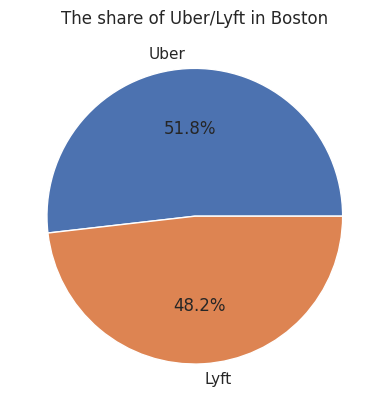

In [138]:
#Visulisation
y=np.array([330568,307408])
labels=['Uber','Lyft']
plt.pie(y,labels=labels,autopct = "%.1f%%")
plt.title('The share of Uber/Lyft in Boston')
plt.show

2.Traffic volume

In [171]:
timeseries=df['datetime'].value_counts()
timeseries.index=pd.to_datetime(timeseries.index)
sorted_series=timeseries.sort_index()

Text(0.5, 1.0, 'Time Series of Ride-railing')

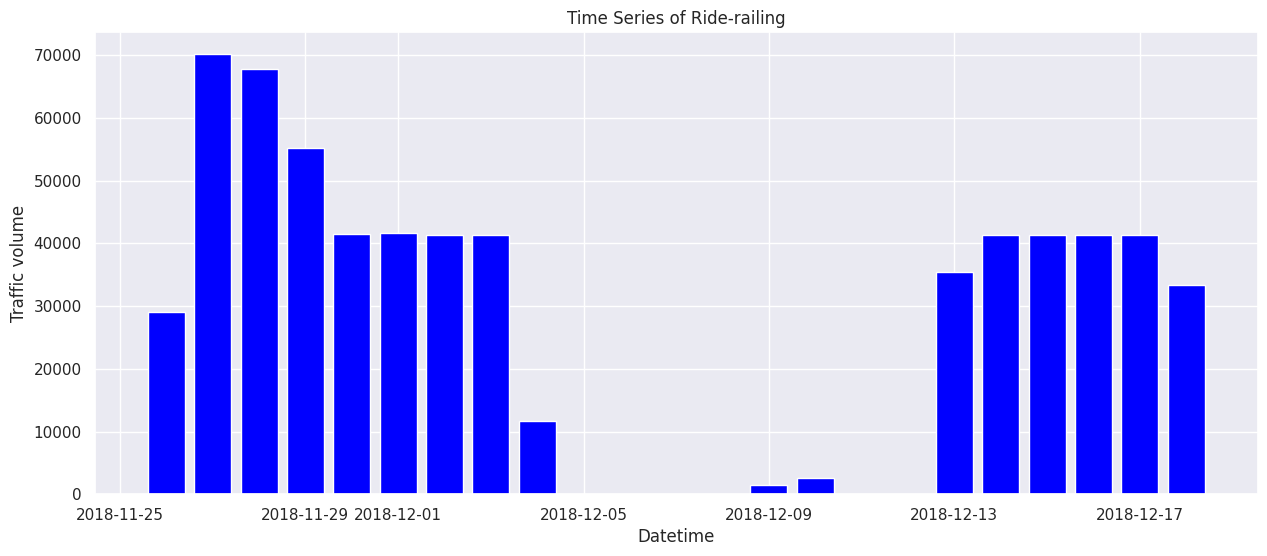

In [172]:
#Time series of ride-hailing
plt.figure(figsize=(15,6))
plt.bar(sorted_series.index,sorted_series.values,color='blue')
plt.xlabel('Datetime')
plt.ylabel('Traffic volume')
plt.title('Time Series of Ride-railing')

In [141]:
#traffic volume in one day(weekday)
#lyft
lyft_weekday_rides_count=lyft_weekday.groupby(['month','day','hour']).size().reset_index(name='count')
lyft_weekday_rides_count=lyft_weekday_rides_count.groupby('hour')['count'].mean()
#uber
uber_weekday_rides_count=uber_weekday.groupby(['month','day','hour']).size().reset_index(name='count')
uber_weekday_rides_count=uber_weekday_rides_count.groupby('hour')['count'].mean()

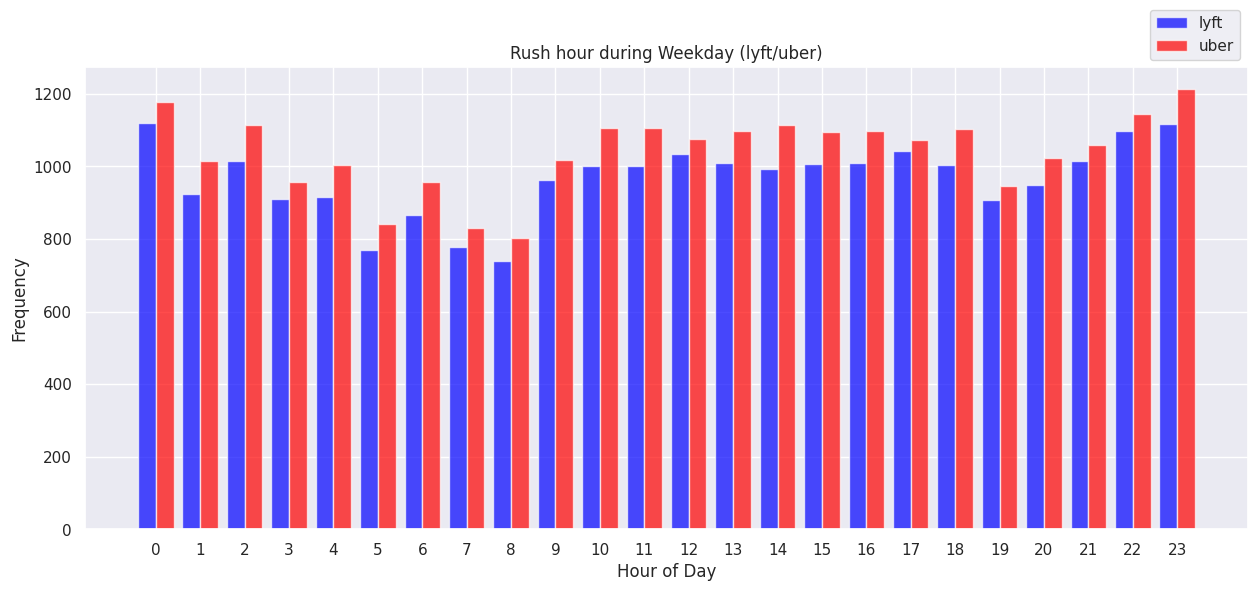

In [142]:
#Visulisation(weekday)
plt.figure(figsize=(15,6))
bar_width=0.4
x1=np.array(range(0,24))-bar_width/2
y1=lyft_weekday_rides_count.values
x2=np.array(range(0,24))+bar_width/2
y2=uber_weekday_rides_count.values
plt.bar(x1,y1,label='lyft',width=bar_width,color='blue',alpha=0.7)
plt.bar(x2,y2,label='uber',width=bar_width,color='red',alpha=0.7)
plt.title('Rush hour during Weekday (lyft/uber)')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0,24))
plt.legend(loc='lower right',bbox_to_anchor=(1,1))
plt.show()

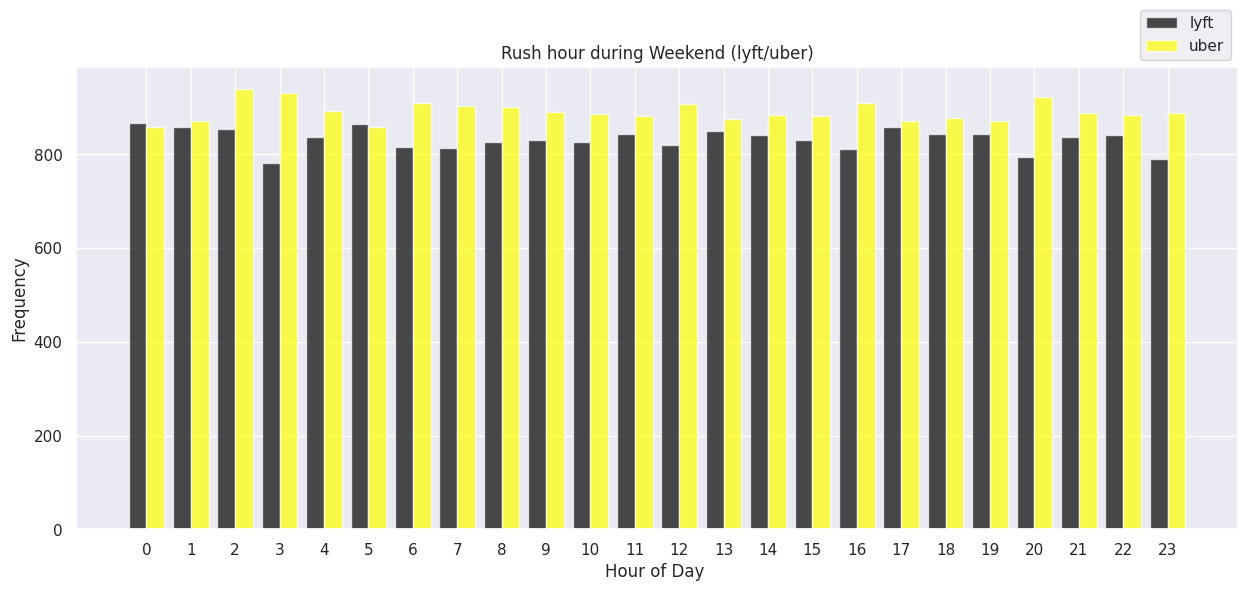

In [143]:
#traffic volume in one day(weekend)
#lyft
lyft_weekend_rides_count=lyft_weekend.groupby(['month','day','hour']).size().reset_index(name='count')
lyft_weekend_rides_count=lyft_weekend_rides_count.groupby('hour')['count'].mean()
#uber
uber_weekend_rides_count=uber_weekend.groupby(['month','day','hour']).size().reset_index(name='count')
uber_weekend_rides_count=uber_weekend_rides_count.groupby('hour')['count'].mean()
#Visulisation(weekend)
plt.figure(figsize=(15,6))
bar_width=0.4
x3=np.array(range(0,24))-bar_width/2
y3=lyft_weekend_rides_count.values
x4=np.array(range(0,24))+bar_width/2
y4=uber_weekend_rides_count.values
plt.bar(x3,y3,label='lyft',width=bar_width,color='black',alpha=0.7)
plt.bar(x4,y4,label='uber',width=bar_width,color='yellow',alpha=0.7)
plt.title('Rush hour during Weekend (lyft/uber)')
plt.xlabel('Hour of Day ')
plt.ylabel('Frequency')
plt.xticks(range(0,24))
plt.legend(loc='lower right',bbox_to_anchor=(1,1))
plt.show()

3.Distance

In [144]:
lyft['distance'].describe()

count    307408.000000
mean          2.186976
std           1.086622
min           0.390000
25%           1.270000
50%           2.140000
75%           2.970000
max           6.330000
Name: distance, dtype: float64

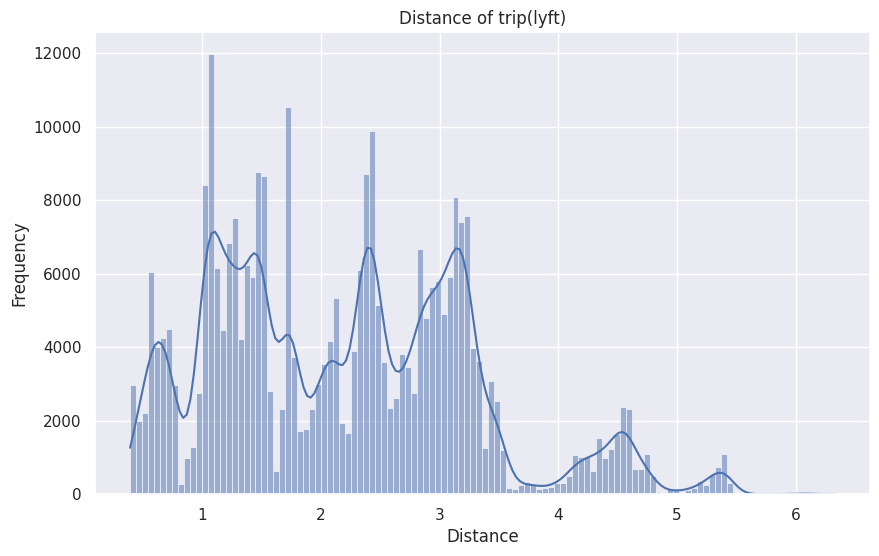

In [145]:
plt.figure(figsize=(10,6))
sns.histplot(lyft['distance'],kde=True)
plt.title('Distance of trip(lyft)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [146]:
uber['distance'].describe()

count    330568.000000
mean          2.191386
std           1.178973
min           0.020000
25%           1.300000
50%           2.170000
75%           2.840000
max           7.860000
Name: distance, dtype: float64

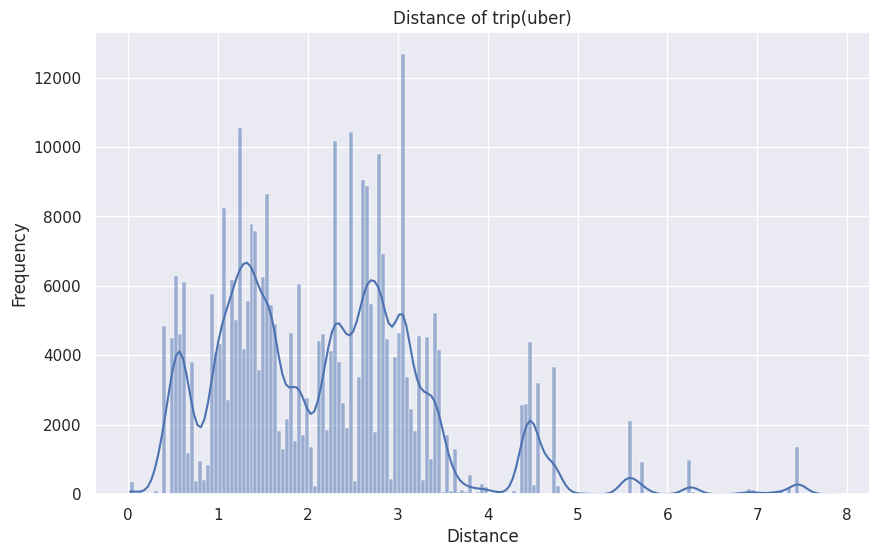

In [147]:
plt.figure(figsize=(10,6))
sns.histplot(uber['distance'],kde=True)
plt.title('Distance of trip(uber)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

4.Source & Destination

In [148]:
#lyft_weekday
source1=lyft_weekday.groupby(['source','hour']).size().reset_index(name='count')
#uber_weekday
source2=uber_weekday.groupby(['source','hour']).size().reset_index(name='count')

<ipython-input-173-35e92d1f6f8e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table1=source1.pivot('source','hour','count')


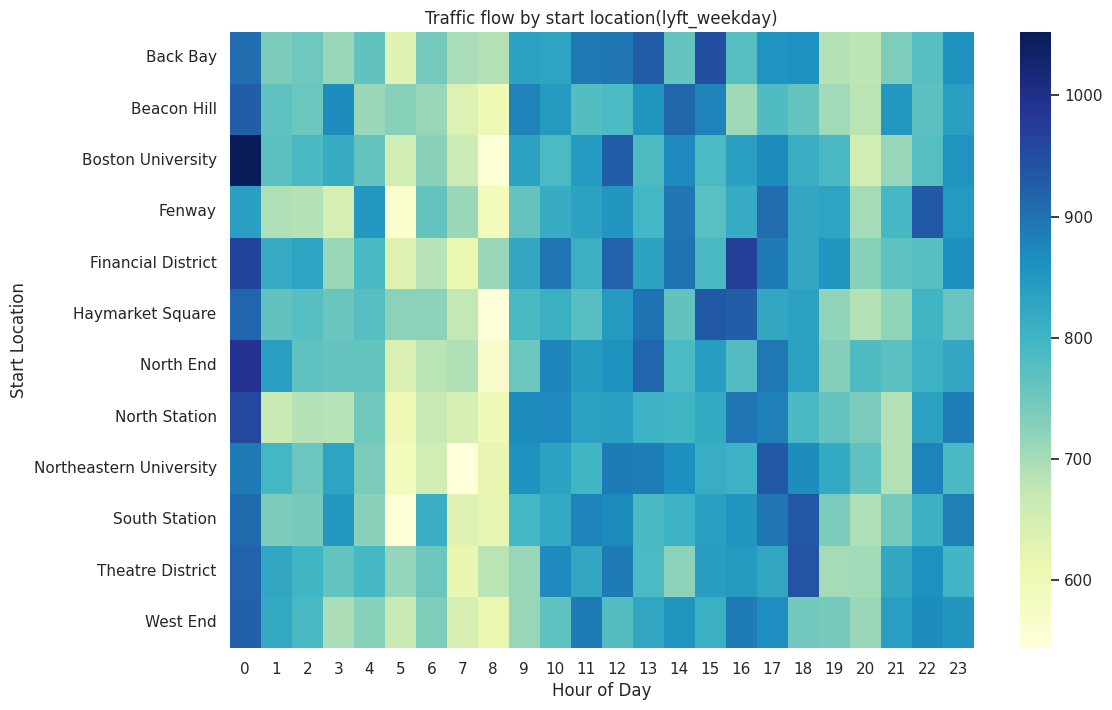

<ipython-input-173-35e92d1f6f8e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table2=source2.pivot('source','hour','count')


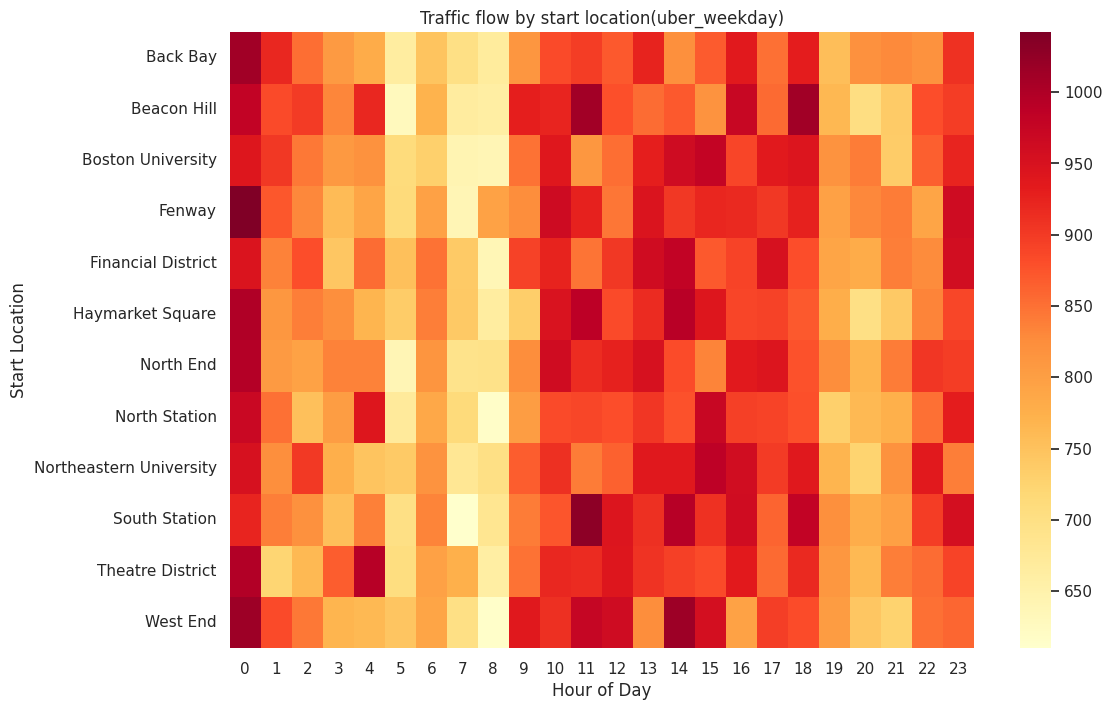

In [173]:
#Visulisation
#lyft
pivot_table1=source1.pivot('source','hour','count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table1,cmap="YlGnBu")
plt.title('Traffic flow by start location(lyft_weekday)')
plt.xlabel('Hour of Day')
plt.ylabel('Start Location')
plt.show()
#uber
pivot_table2=source2.pivot('source','hour','count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table2,cmap="YlOrRd")
plt.title('Traffic flow by start location(uber_weekday)')
plt.xlabel('Hour of Day')
plt.ylabel('Start Location')
plt.show()

In [150]:
#lyft_weekend
source3=lyft_weekend.groupby(['source','hour']).size().reset_index(name='count')
#uber_weekend
source4=uber_weekend.groupby(['source','hour']).size().reset_index(name='count')

<ipython-input-151-c3d52b2e786c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table3=source3.pivot('source','hour','count')


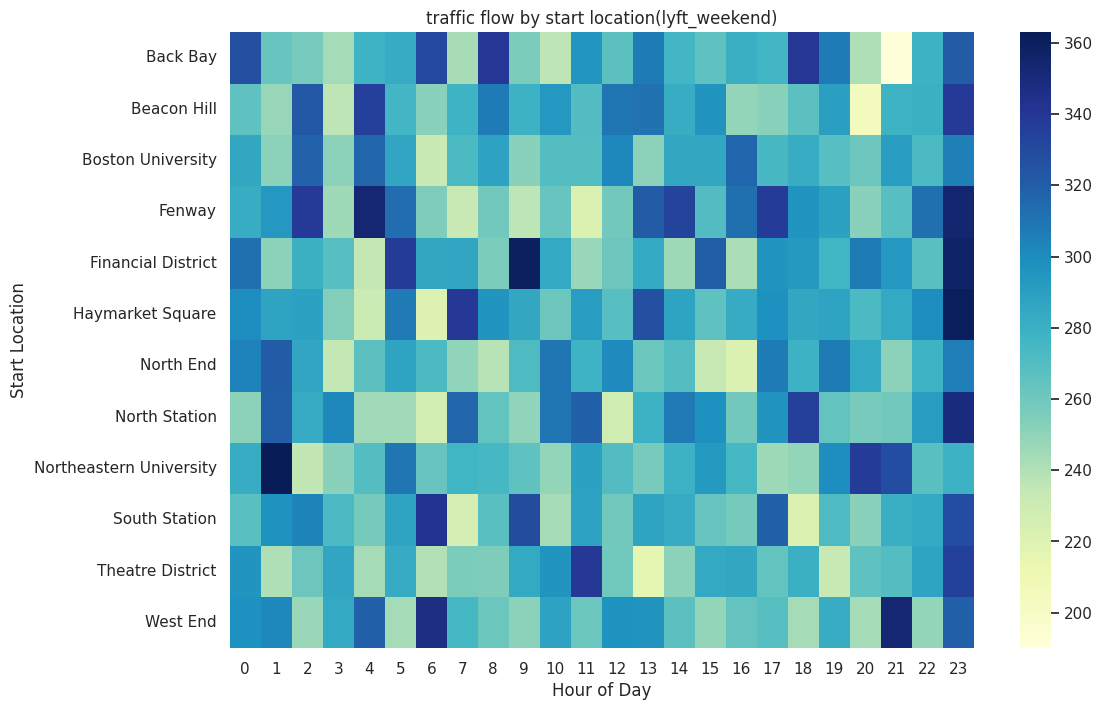

<ipython-input-151-c3d52b2e786c>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table4=source4.pivot('source','hour','count')


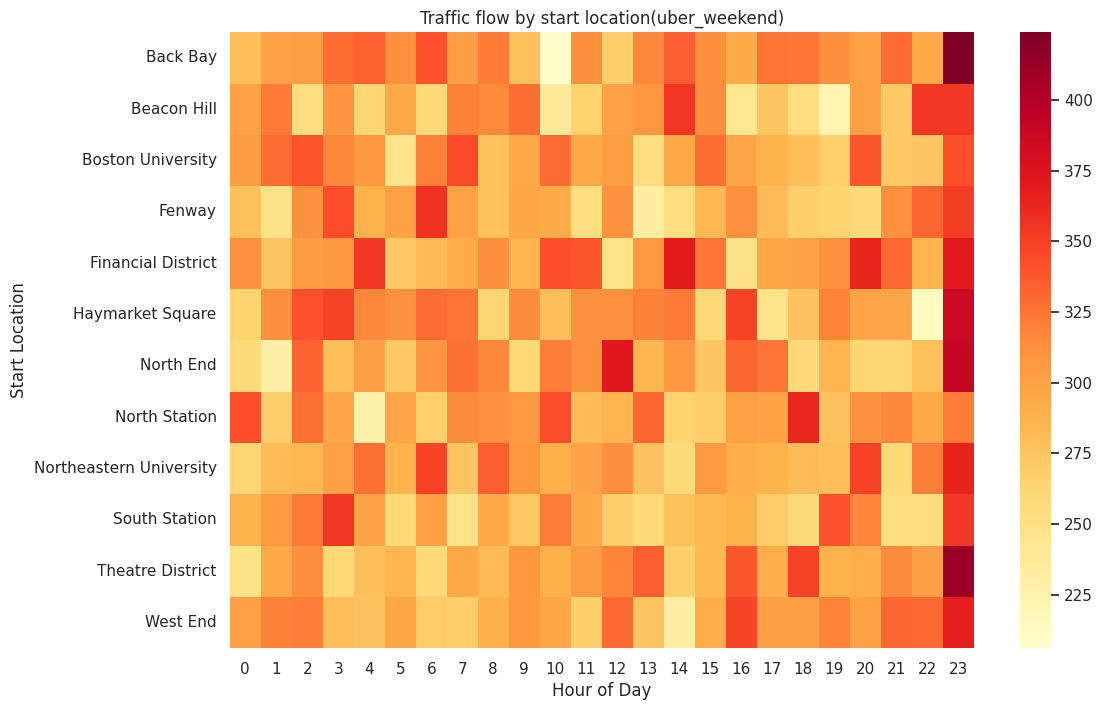

In [151]:
#Visulisation
#lyft
pivot_table3=source3.pivot('source','hour','count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table3,cmap="YlGnBu")
plt.title('traffic flow by start location(lyft_weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Start Location')
plt.show()
#uber
pivot_table4=source4.pivot('source','hour','count')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table4,cmap="YlOrRd")
plt.title('Traffic flow by start location(uber_weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Start Location')
plt.show()

5.Price

In [152]:
lyft['price per kilometre'].describe()

count    307408.000000
mean          9.683326
std           7.574894
min           0.556586
25%           4.901961
50%           7.947977
75%          11.870504
max         114.130435
Name: price per kilometre, dtype: float64

In [153]:
uber['price per kilometre'].describe()

count    330568.000000
mean          9.691718
std          17.583156
min           1.474531
25%           4.458599
50%           7.070707
75%          11.250000
max        1375.000000
Name: price per kilometre, dtype: float64

In [154]:
q3_1=lyft['price per kilometre'].quantile(0.75)
lyft=lyft[lyft['price per kilometre']<=q3_1]
q3_2=uber['price per kilometre'].quantile(0.75)
uber=uber[uber['price per kilometre']<=q3_2]

In [155]:
lyft['price per kilometre'].describe()

count    230633.000000
mean          6.493125
std           2.851028
min           0.556586
25%           3.954802
50%           6.445312
75%           8.873720
max          11.870504
Name: price per kilometre, dtype: float64

In [156]:
uber['price per kilometre'].describe()

count    247935.000000
mean          6.056993
std           2.423306
min           1.474531
25%           3.881279
50%           5.737705
75%           7.904412
max          11.250000
Name: price per kilometre, dtype: float64

In [157]:
lyft_average_hour_price=lyft.groupby('hour')['price per kilometre'].mean()
uber_average_hour_price=uber.groupby('hour')['price per kilometre'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

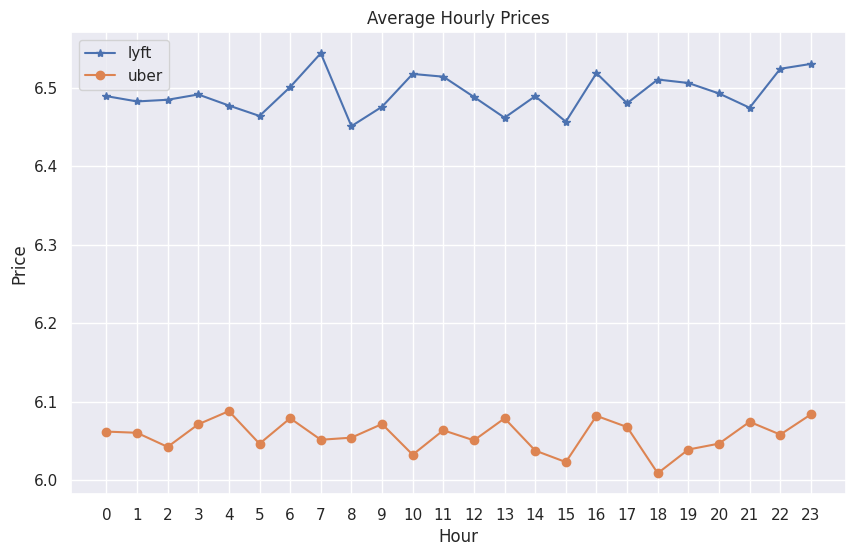

In [158]:
#Visualizing
plt.figure(figsize=(10,6))
x1=lyft_average_hour_price
x2=uber_average_hour_price
plt.plot(x1.index,x1.values,label='lyft',marker='*')
plt.plot(x2.index,x2.values,label='uber',marker='o')
plt.legend()
plt.title('Average Hourly Prices')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.xticks(range(0,24))
plt.show

Correlation

In [159]:
#Merging the 'price','count'cloumn and grouping by timeseries and weather
weather_ride_count=lyft.groupby(['timeseries','Weather']).size().reset_index(name='count')
weather_ave_price=lyft.groupby(['timeseries','Weather'])['price per kilometre'].mean().reset_index()
merge1=pd.merge(weather_ride_count,weather_ave_price,on=['timeseries','Weather'])
merge1

,timeseries,Weather,count,price per kilometre
0,2018-11-26 03:00:00,1,35,6.328078
1,2018-11-26 04:00:00,1,112,6.722675
2,2018-11-26 05:00:00,1,222,6.366808
3,2018-11-26 06:00:00,1,521,6.532932
4,2018-11-26 07:00:00,1,334,6.486422
...,...,...,...,...
327,2018-12-18 15:00:00,0,587,6.609551
328,2018-12-18 16:00:00,0,597,6.523025
329,2018-12-18 17:00:00,0,621,6.392814
330,2018-12-18 18:00:00,0,658,6.607733


In [160]:
weather_ride_count=uber.groupby(['timeseries','Weather']).size().reset_index(name='count')
weather_ave_price=uber.groupby(['timeseries','Weather'])['price per kilometre'].mean().reset_index()
merge2=pd.merge(weather_ride_count,weather_ave_price,on=['timeseries','Weather'])

In [161]:
correlation1=merge1[['count','Weather','price per kilometre']].corr()
correlation1

,count,Weather,price per kilometre
count,1.000000,-0.055745,0.027332
Weather,-0.055745,1.000000,0.050254
price per kilometre,0.027332,0.050254,1.000000


In [162]:
correlation2=merge2[['count','Weather','price per kilometre']].corr()
correlation2

,count,Weather,price per kilometre
count,1.000000,-0.046399,0.106482
Weather,-0.046399,1.000000,-0.020719
price per kilometre,0.106482,-0.020719,1.000000


# Predication

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [164]:
#Selecting input varibles
p_uber=uber[['hour','source','destination','name','price per kilometre','Weather','weekday/weekend']]
p_uber

,hour,source,destination,name,price per kilometre,Weather,weekday/weekend
12,22,North End,West End,standard 6,10.810811,0,Weekday
14,19,North End,West End,standard 4,6.756757,0,Weekday
15,23,North End,West End,WAV,6.756757,1,Weekend
17,19,North End,West End,share,4.954955,0,Weekday
25,20,Beacon Hill,South Station,WAV,3.427419,1,Weekday
...,...,...,...,...,...,...,...
693061,5,Theatre District,Haymarket Square,standard 4,9.316770,1,Weekend
693062,5,Theatre District,Haymarket Square,WAV,9.316770,1,Weekend
693065,23,West End,North End,WAV,9.500000,1,Weekend
693067,23,West End,North End,standard 4,9.500000,1,Weekend


In [165]:
#Spliting training set and test set
y=p_uber['price per kilometre']
X=p_uber.drop(columns=['price per kilometre'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [166]:
#Machine learning
numeric_features=['hour','Weather']
categorical_features=['source','destination','name','weekday/weekend']
preprocessor=ColumnTransformer(
    transformers=[
        ("num",MinMaxScaler(),numeric_features),
        ("cat",OneHotEncoder(drop='first',handle_unknown="ignore",sparse=False),categorical_features),
    ],
)

clf_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeRegressor())
])

clf_pipeline.fit(X_train,y_train)

print('Training set score:'+str(clf_pipeline.score(X_train,y_train)))
print('Test set score:'+str(clf_pipeline.score(X_test,y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set score:0.8881132877930601
Test set score:0.8409503313947018


In [167]:
#Evaluation
y_pred=clf_pipeline.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.9356137737967881
Root Mean Squared Error: 0.9672713030979406
Mean Absolute Error: 0.6678116851551543
R² Score: 0.8409503313947018


In [168]:
#Defining conditions
hour=[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]
weather=[0,1]
source=['Back Bay','Bacon Hill','Boston University','Fenway','Financial District','Haymarket Square','North End','North station','Northeastern University','South Station','Theatre District','West End']
destination=['Back Bay','Bacon Hill','Boston University','Fenway','Financial District','Haymarket Square','North End','North station','Northeastern University','South Station','Theatre District','West End']
name=['share','standard 4','premium plus 4','premimum 5','standard 6','Wav']
weekday_weekend=['weekday','weekend']

In [169]:
#Output all condition groups and set a dataframe
import itertools
all_condition_group=list(itertools.product(hour,weather,source,destination,name,weekday_weekend))
pre_result=pd.DataFrame(all_condition_group,columns=['hour','Weather','source','destination','name','weekday/weekend'])
pre_result=pre_result[pre_result['source']!=pre_result['destination']]
pre_result

,hour,Weather,source,destination,name,weekday/weekend
12,0,0,Back Bay,Bacon Hill,share,weekday
13,0,0,Back Bay,Bacon Hill,share,weekend
14,0,0,Back Bay,Bacon Hill,standard 4,weekday
15,0,0,Back Bay,Bacon Hill,standard 4,weekend
16,0,0,Back Bay,Bacon Hill,premium plus 4,weekday
...,...,...,...,...,...,...
79471,23,1,West End,Theatre District,premimum 5,weekend
79472,23,1,West End,Theatre District,standard 6,weekday
79473,23,1,West End,Theatre District,standard 6,weekend
79474,23,1,West End,Theatre District,Wav,weekday


In [170]:
#Adding predicted outcomes to dataframe
predicted_prices=clf_pipeline.predict(pre_result)
pre_result['predicted_price']=predicted_prices
pre_result.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,hour,Weather,source,destination,name,weekday/weekend,predicted_price
12,0,0,Back Bay,Bacon Hill,share,weekday,4.799652
13,0,0,Back Bay,Bacon Hill,share,weekend,4.799652
14,0,0,Back Bay,Bacon Hill,standard 4,weekday,6.343284
15,0,0,Back Bay,Bacon Hill,standard 4,weekend,6.343284
16,0,0,Back Bay,Bacon Hill,premium plus 4,weekday,9.908537
17,0,0,Back Bay,Bacon Hill,premium plus 4,weekend,9.908537
18,0,0,Back Bay,Bacon Hill,premimum 5,weekday,5.671642
19,0,0,Back Bay,Bacon Hill,premimum 5,weekend,5.671642
20,0,0,Back Bay,Bacon Hill,standard 6,weekday,8.500150
21,0,0,Back Bay,Bacon Hill,standard 6,weekend,8.500150




---

